# 1. DNN

In [67]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.1.0


## 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

## 데이터 전처리

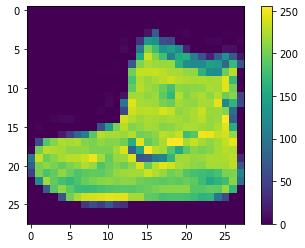

In [9]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
x_train = x_train / 255.0

x_test = x_test / 255.0

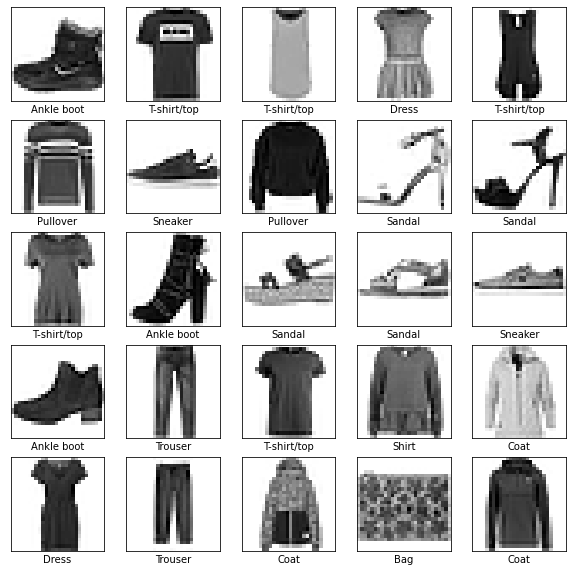

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 모델 구성

### 층 설정

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [14]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5055 - accuracy: 0.8219
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3803 - accuracy: 0.8622
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3397 - accuracy: 0.8763
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3168 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2962 - accuracy: 0.8918


## 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3411 - accuracy: 0.8754

테스트 정확도: 0.8754


## 예측 만들기

In [16]:
predictions = model.predict(x_test)

In [17]:
predictions[0]

array([2.8317598e-07, 4.3020481e-09, 2.8650743e-07, 2.6346052e-08,
       1.9216864e-07, 5.4929801e-03, 4.9251571e-06, 1.4815983e-02,
       4.0175387e-06, 9.7968125e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
y_test[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

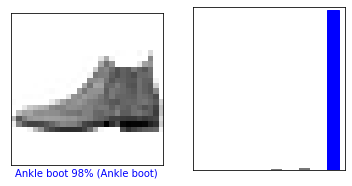

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

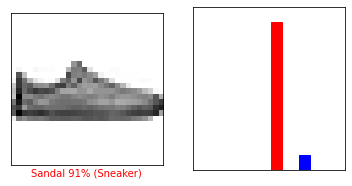

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

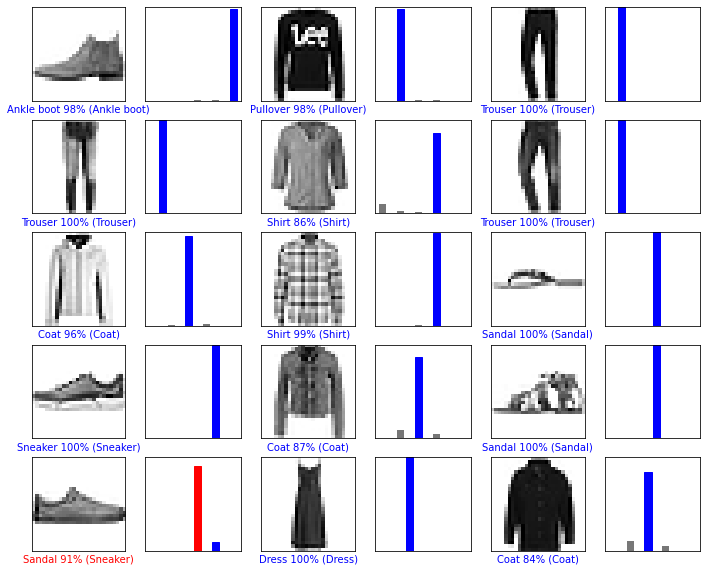

In [23]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [24]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = x_test[0]

print(img.shape)

(28, 28)


In [25]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8317572e-07 4.3020236e-09 2.8650743e-07 2.6346003e-08 1.9216864e-07
  5.4929773e-03 4.9251571e-06 1.4815970e-02 4.0175350e-06 9.7968125e-01]]


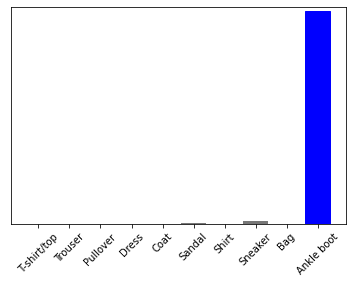

In [27]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9

# 2. CNN 
* reshape 필수

In [60]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [61]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [77]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [78]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)            

In [79]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [80]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 538us/sample - loss: 2.3029 - accuracy: 0.0988
Epoch 2/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3028 - accuracy: 0.0984
Epoch 3/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3027 - accuracy: 0.0990
Epoch 4/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3027 - accuracy: 0.0999
Epoch 5/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3027 - accuracy: 0.0992
Epoch 6/10
60000/60000 [==============================] - 31s 525us/sample - loss: 2.3027 - accuracy: 0.0991
Epoch 7/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3027 - accuracy: 0.0980
Epoch 8/10
60000/60000 [==============================] - 31s 524us/sample - loss: 2.3027 - accuracy: 0.0993
Epoch 9/10
60000/60000 [==============================] - 32s 526us/sample - loss: 2.3027 - accuracy: 0.0

In [83]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1
